### Carregamento de bibliotecas

In [1]:
from scipy import ndimage, misc
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
import math
import sys

### Carregamento das imagens experimentais

In [2]:
rgb_weights = [0.2989, 0.5870, 0.1140]
#grayscale_image = np.dot(imgs_open[1], rgb_weights)


#load images in the three formats: bmp, png, tiff

imgs_open = []
imgs_open.append(np.dot(iio.imread('./images/open.bmp'), rgb_weights))
#imgs_open.append(np.dot(iio.imread('./images/open.png'), rgb_weights))
#imgs_open.append(np.dot(iio.imread('./images/open.tiff'), rgb_weights))

imgs_PA_ponto = []
imgs_PA_ponto.append(np.dot(iio.imread('./images/alto.bmp'), rgb_weights))
#imgs_PA_ponto.append(iio.imread('./images/alto.png'))
#imgs_PA_ponto.append(iio.imread('./images/alto.tiff'))

imgs_PB_1 = []
imgs_PB_1.append(np.dot(iio.imread('./images/close_1mm.bmp'), rgb_weights))
#imgs_PB_1.append(iio.imread('./images/close_1mm.png'))
#imgs_PB_1.append(iio.imread('./images/close_1mm.tiff'))


imgs_cartao = []
imgs_cartao.append(np.dot(iio.imread('./images/cartao.bmp'), rgb_weights))
#imgs_cartao.append(iio.imread('./images/cartao.png'))

imgs_PA_cartao = []
imgs_PA_cartao.append(np.dot(iio.imread('./images/alto_cartao.bmp'), rgb_weights))
#imgs_PA_cartao.append(iio.imread('./images/alto_cartao.png'))
#imgs_PA_cartao.append(iio.imread('./images/alto_cartao.tiff'))

imgs_PB_cartao_1 = []
imgs_PB_cartao_1.append(np.dot(iio.imread('./images/baixo_cartao_1mm.bmp'), rgb_weights))
#imgs_PB_cartao_1.append(iio.imread('./images/baixo_cartao_1mm.png'))

imgs_PB_cartao_9 = []
imgs_PB_cartao_9.append(np.dot(iio.imread('./images/baixo_09mm_cartaoCarto.bmp'), rgb_weights))
#imgs_PB_cartao_9.append(iio.imread('./images/baixo_09mm_cartaoCarto.png'))

Trabalha-se com as imagens no formato png

### Funções para aplicação dos filtros digitais

In [4]:
def center(img_pad, rows, columns):
    #receives:
    #. image - img_pad
    #. number of image's rows - rows
    #. number of image's columns - columns
    #returns:
    #. image with centered/decentered spectrum - img_pad
    
    for i in range(rows):
        for j in range(columns):
            img_pad[i,j] *= (-1)**(i+j)
    return img_pad

In [5]:
def passa_baixo_low_memory(img, img_exp, f_rad = 0.1):
    
    #get dimensions
    rows, columns =  np.shape(img)[0], np.shape(img)[1]
    print(rows, columns)
    
    
    #fourier transform - original and experimentally filtered image
    FT = np.fft.fft2(center(img.copy(), rows, columns))
    FT_exp = np.fft.fft2(center(img_exp.copy(), rows, columns))
    
    #calculate radius of filter to be applied - given by the scale factor f_rad
    radius = int(f_rad*rows)
    
    #construct filter
    Filter = FT.copy()
    Filter[:] = 0
    for i in range(rows):
        for j in range(columns):
            if np.sqrt((rows//2-i)**2 + (columns//2-j)**2)<=radius:
                Filter[i, j] = 1
    
    #apply filter
    FFT_new = FT*Filter
    
    #obtain new image: inverse fourier
    img_new_ = (np.fft.ifft2(FFT_new)).real
    img_new = center(img_new_, rows, columns)
    
    _, axs = plt.subplots(3,2, figsize = [12,12], constrained_layout = True)
    axs[0,0].imshow(img, cmap = 'gray')
    axs[0,1].imshow(np.log(abs(FT)+1), cmap = 'gray')
    axs[1,0].imshow(img_exp, cmap = 'gray')
    axs[1,1].imshow(np.log(abs(FT_exp)+1), cmap = 'gray')
    axs[2,0].imshow(img_new, cmap = 'gray')
    axs[2,1].imshow(np.log(abs(FFT_new)+1), cmap = 'gray')
    
    return 

1544 2064


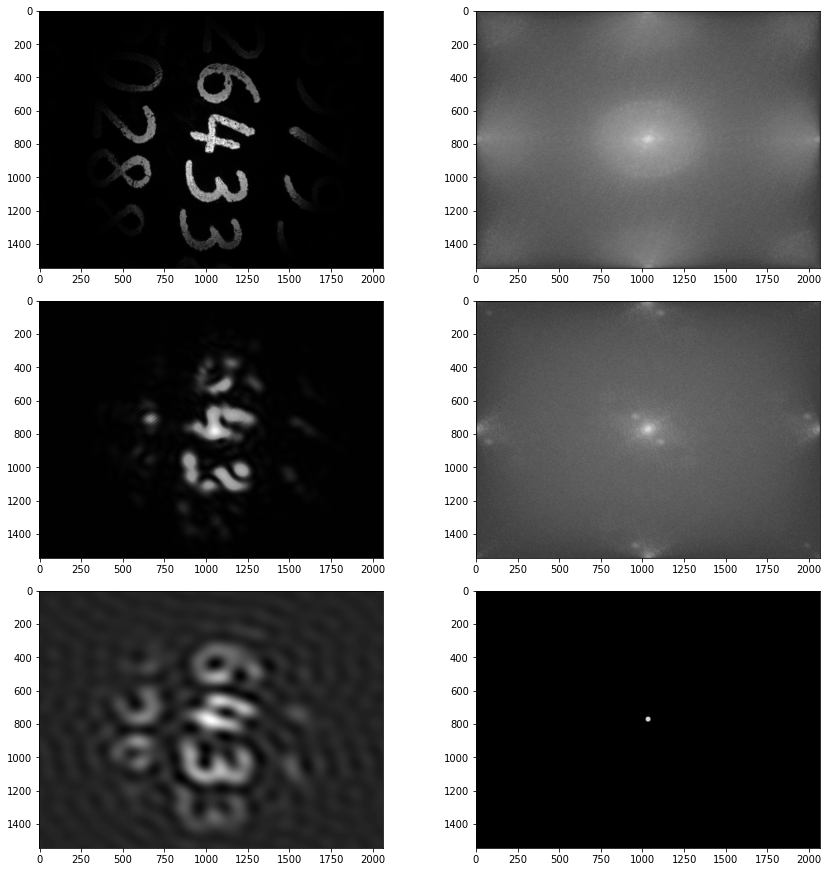

In [8]:
passa_baixo_low_memory(imgs_open[0], imgs_PB_1[0], f_rad = 0.01)

# TESTES (não interessa)

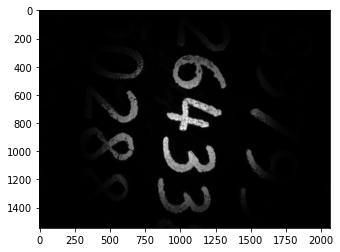

In [28]:

















































rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(imgs_open[1], rgb_weights)

plt.imshow(grayscale_image, cmap = 'gray')

In [39]:
np.shape(iio.imread('./images/alto.tiff'))

(1544, 2064, 4)

In [16]:
def passa_baixo(img, img_exp, f_rad = 0.1):
    
    #get dimensions
    rows, columns =  np.shape(img)[0], np.shape(img)[1]
    print(rows, columns)
    
    #pad image
    img_pad = np.pad(img, ((int(rows/2), int(rows/2)), (int(columns/2), int(columns/2))), mode='reflect')    
    img_exp_pad = np.pad(img_exp, ((int(rows/2), int(rows/2)), (int(columns/2), int(columns/2))), mode='reflect')
    rows_pad, columns_pad = np.shape(img_pad)[0], np.shape(img_pad)[1]
    
    #fourier transform - original and experimentally filtered image
    FT = np.fft.fft2(img_pad)
    FT_exp = np.fft.fft2(img_exp_pad)
    
    #calculate radius of filter to be applied - given by the scale factor f_rad
    radius = f_rad*columns
    
    #construct filter
    Filter = FT.copy()
    Filter[:] = 0
    Filter[rows_pad//2-radius:rows_pad//2 + radius, columns_pad//2-radius:columns_pad//2 + radius] = 1
    
    #apply filter
    FFT_new = FFT*Filter
    
    #obtain new image: inverse fourier
    img_pad_new = (np.fft.ifft2(FFT_new)).real
    
    #final image with the real dimensions
    img_new = img_pad_new[rows/2:-rows/2, columns/2:-columns/2]
    
    _, axs = plt.subplots(3,2, fig_size = [12,12], constrained_size = True)
    axs[0].imshow(img, cmap = 'gray')
    axs[1].imshow(FFT, cmap = 'gray')
    axs[2].imshow(img_exp, cmap = 'gray')
    axs[3].imshow(FFT_exp, cmap = 'gray')
    axs[4].imshow(img_new, cmap = 'gray')
    axs[5].imshow(FFT_new, cmap = 'gray')
    
    return 